# Home Credit Default 

## 1. Set-up

In [1]:
# Import necessary libraries for data preparation/EDA
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

sns.set_style('darkgrid')

In [244]:
# Set directory and import application training data
os.chdir(r'C:\Users\Jared\Documents\datasci\projects\kaggle\home_credit_default')
application_train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

## 2. EDA

### Target distribution

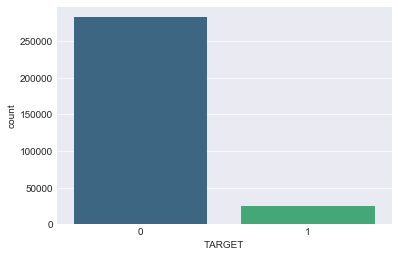

% Positive Class: 8.07


In [214]:
# Countplot of the target variable indicates how imbalanced this dataset is
sns.countplot('TARGET', data=application_train, palette='viridis')
plt.show()
print('% Positive Class: {}'.format(100*round(application_train['TARGET'].mean(),4)))

### Missing values

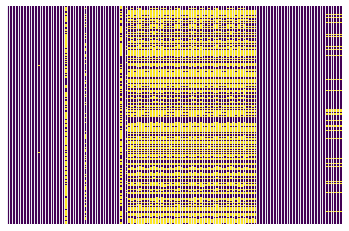

In [4]:
# Visualize missing data - determine the extent of missings in the dataset
# Not super informative with this many features
sns.heatmap(application_train.isnull(), yticklabels=False, xticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [215]:
# Create a dataframe with information on these missing values
tot_msg = application_train.isnull().sum(axis=0)
pct_msg = tot_msg/application_train.shape[0]
msg_info = pd.concat([tot_msg, pct_msg], axis=1)
msg_info.columns = ['# Missing Obs.', '% Missing Obs.']

msg_info[2:62]

,# Missing Obs.,% Missing Obs.
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039
AMT_GOODS_PRICE,278,0.000904
NAME_TYPE_SUITE,1292,0.004201


In [216]:
msg_info[63:122]

,# Missing Obs.,% Missing Obs.
ELEVATORS_MODE,163891,0.532960
ENTRANCES_MODE,154828,0.503488
FLOORSMAX_MODE,153020,0.497608
FLOORSMIN_MODE,208642,0.678486
LANDAREA_MODE,182590,0.593767
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAREA_MODE,154350,0.501933
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAREA_MODE,169682,0.551792
APARTMENTS_MEDI,156061,0.507497


In [245]:
# In order to speed up some processing, remove the housing summary statistics that are predominantly missing from the data
to_drop_ = application_train.columns[44:91].tolist()
application_train.drop(to_drop_, axis=1, inplace=True)
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

### Distributions of key variables

#### AMT_INCOME_TOTAL

In [246]:
application_train['Default'] = np.where(application_train['TARGET'] == 1, "Defaulted", "Paid")

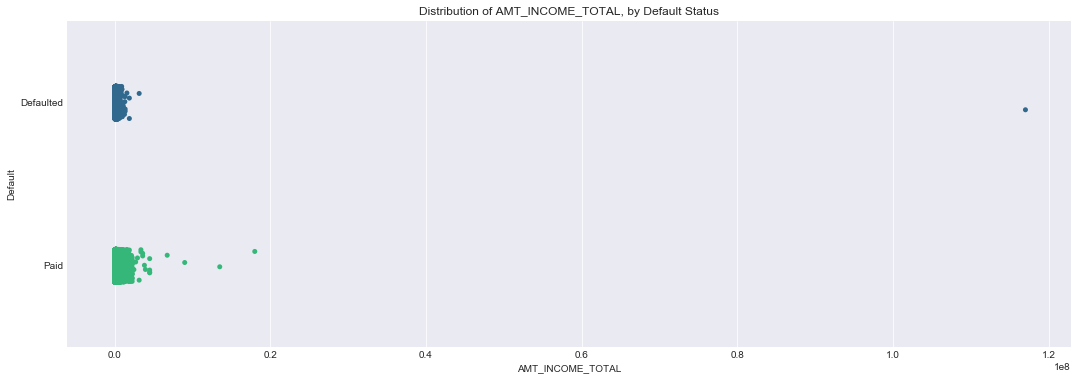

In [229]:
# Look at distribution of AMT_INCOME_TOTAL
plt.figure(figsize=(18,6))
plt.title('Distribution of AMT_INCOME_TOTAL, by Default Status')
sns.stripplot(x='AMT_INCOME_TOTAL', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

In [19]:
# Given the clear outliers toward the end of the distribution, remove these
application_train['AMT_INCOME_TOTAL'].max()

117000000.0

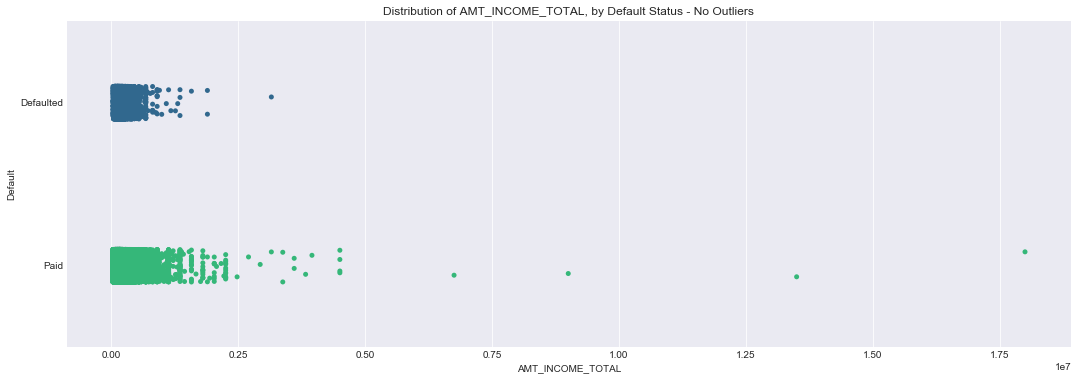

In [20]:
_ = application_train[application_train['AMT_INCOME_TOTAL'] != 1.170000e+08]
plt.figure(figsize=(18,6))
plt.title('Distribution of AMT_INCOME_TOTAL, by Default Status - No Outliers')
sns.stripplot(x='AMT_INCOME_TOTAL', y='Default', data=_, jitter=1, palette='viridis')
plt.show()

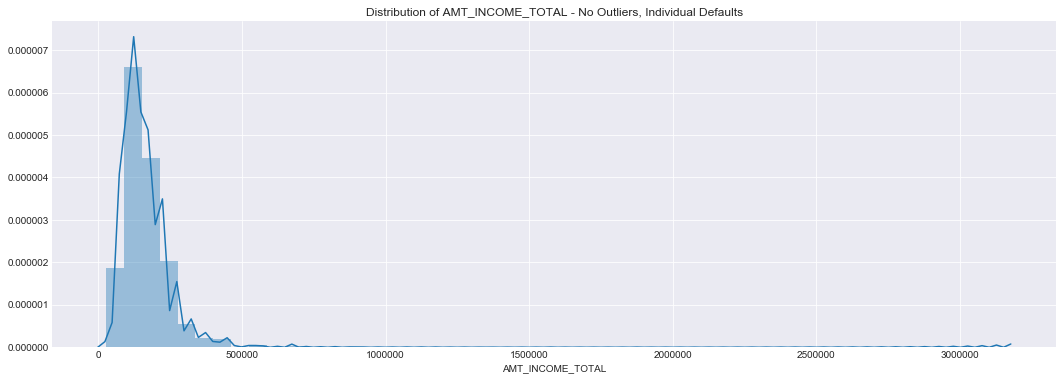

In [21]:
plt.figure(figsize=(18,6))
plt.title("Distribution of AMT_INCOME_TOTAL - No Outliers, Individual Defaults")
sns.distplot(_[_['TARGET']==1].AMT_INCOME_TOTAL)
plt.show()

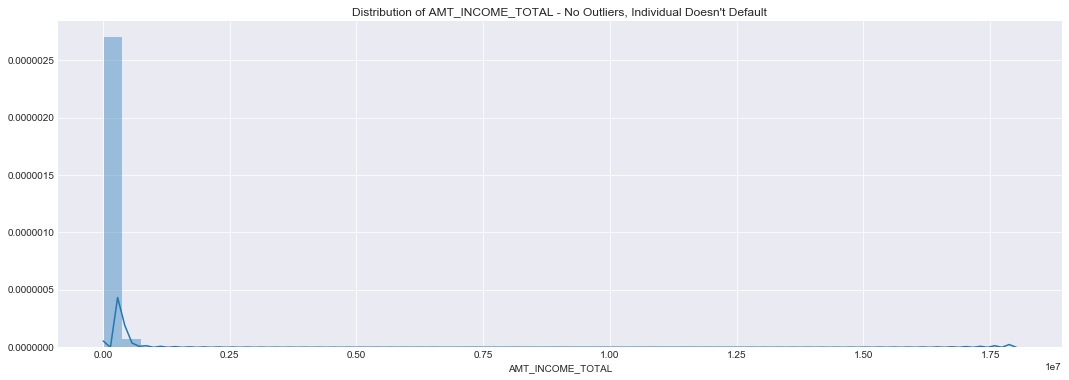

In [22]:
plt.figure(figsize=(18,6))
plt.title("Distribution of AMT_INCOME_TOTAL - No Outliers, Individual Doesn't Default")
sns.distplot(_[_['TARGET']==0].AMT_INCOME_TOTAL)
plt.show()

#### AMT_CREDIT

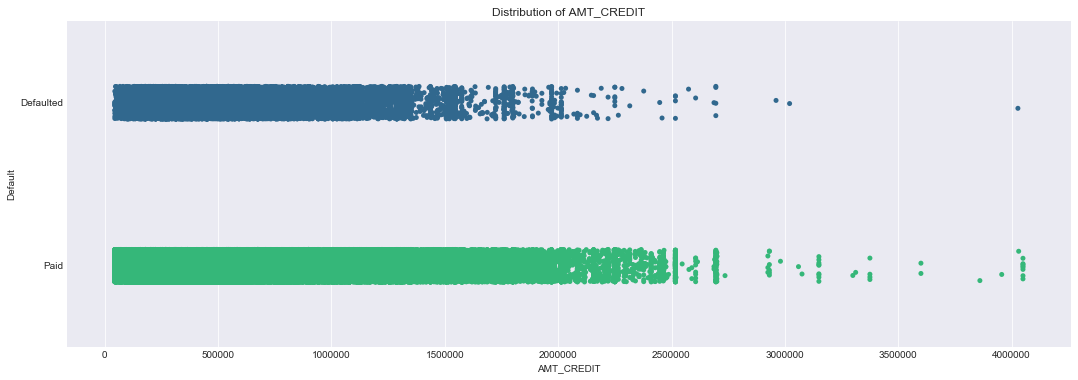

In [23]:
plt.figure(figsize=(18,6))
plt.title("Distribution of AMT_CREDIT")
sns.stripplot(x='AMT_CREDIT', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

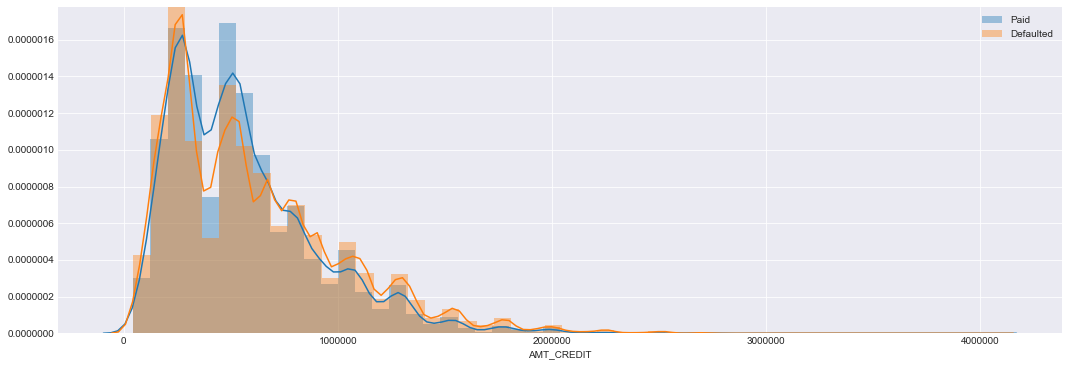

In [59]:
fig, ax = plt.subplots(figsize=(18,6))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].AMT_CREDIT, label=labels_[target])
    
plt.legend()
plt.show()

#### AMT_ANNUITY

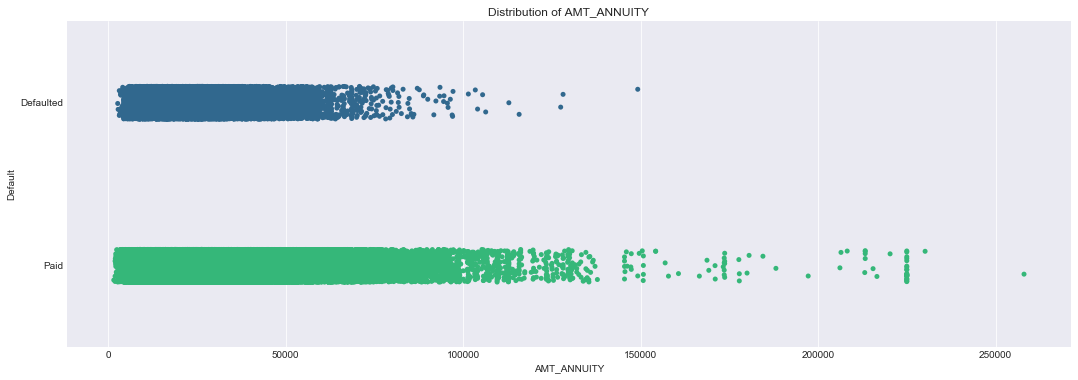

In [28]:
plt.figure(figsize=(18,6))
plt.title("Distribution of AMT_ANNUITY")
sns.stripplot(x='AMT_ANNUITY', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

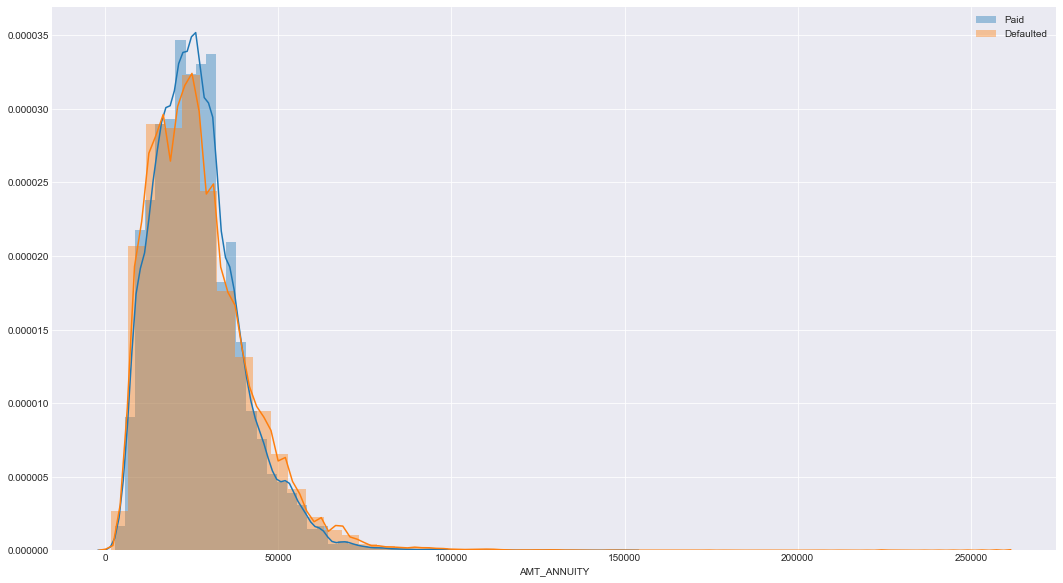

In [60]:
fig, ax = plt.subplots(figsize=(18,10))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].AMT_ANNUITY.dropna(), label=labels_[target])
      
plt.legend()
plt.show()

#### AMT_GOODS_PRICE

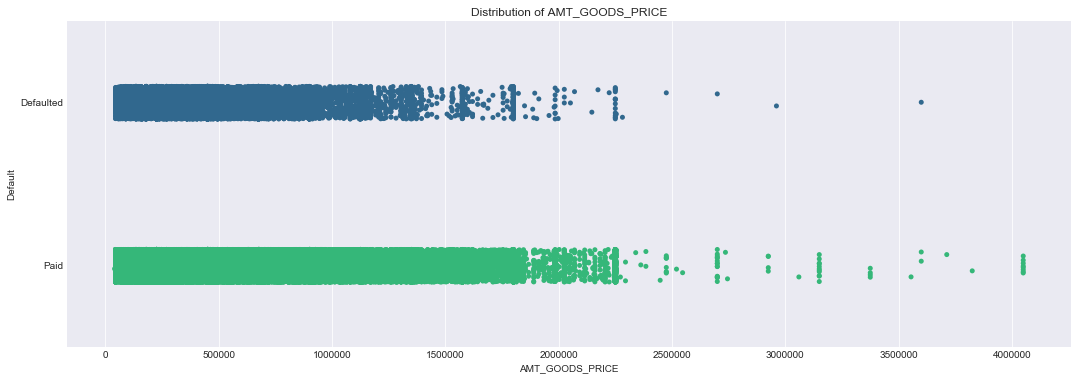

In [33]:
plt.figure(figsize=(18,6))
plt.title("Distribution of AMT_GOODS_PRICE")
sns.stripplot(x='AMT_GOODS_PRICE', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

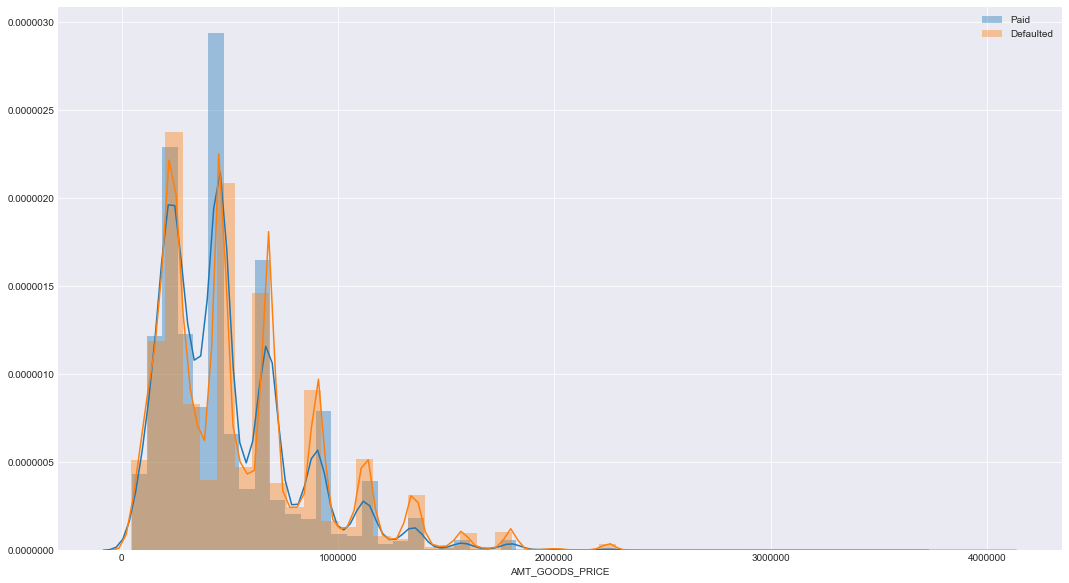

In [61]:
fig, ax = plt.subplots(figsize=(18,10))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].AMT_GOODS_PRICE.dropna(), label=labels_[target])
    
plt.legend()
plt.show()

#### DAYS_EMPLOYED

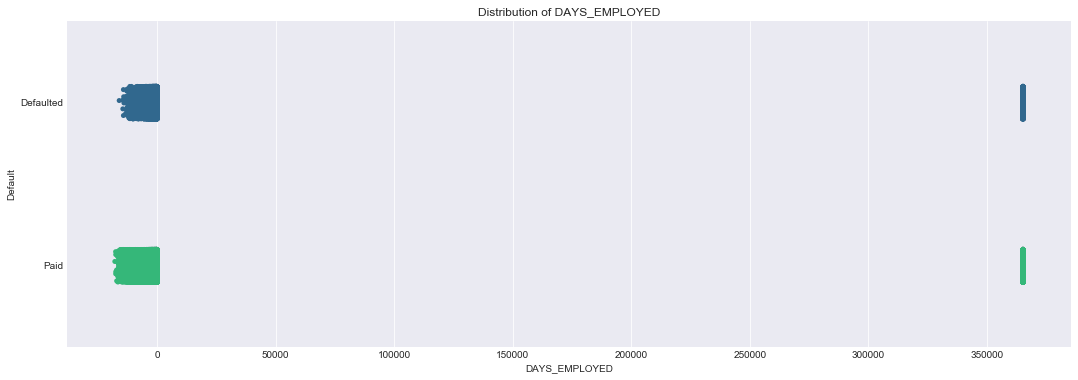

In [35]:
plt.figure(figsize=(18,6))
plt.title("Distribution of DAYS_EMPLOYED")
sns.stripplot(x='DAYS_EMPLOYED', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

In [36]:
# Given the clear outliers toward the end of the distribution, remove these
application_train['DAYS_EMPLOYED'].max()

365243

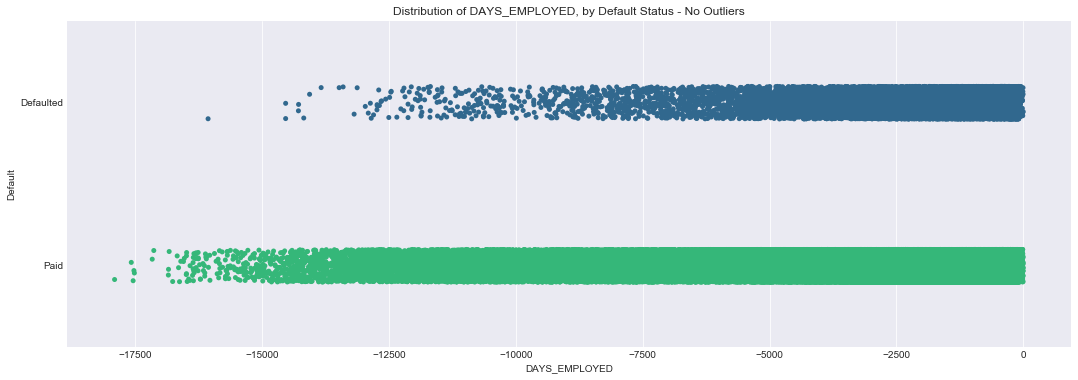

In [37]:
_ = application_train[application_train['DAYS_EMPLOYED'] != 365243]
plt.figure(figsize=(18,6))
plt.title('Distribution of DAYS_EMPLOYED, by Default Status - No Outliers')
sns.stripplot(x='DAYS_EMPLOYED', y='Default', data=_, jitter=1, palette='viridis')
plt.show()

#### DAYS_BIRTH

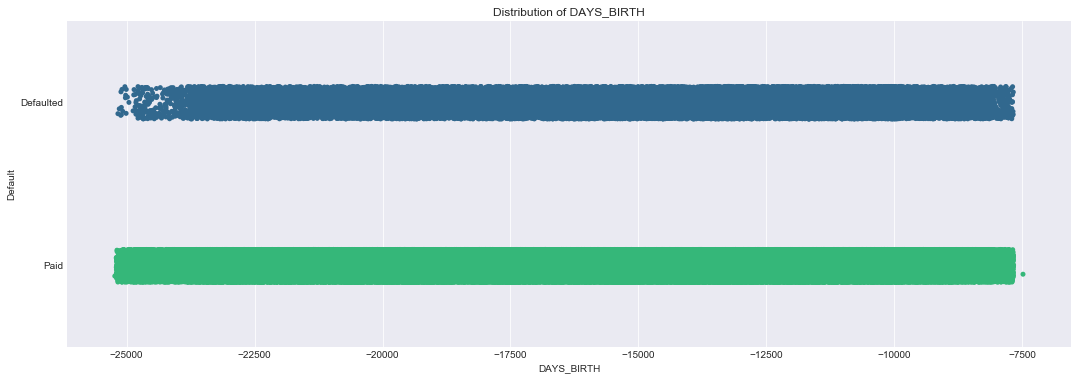

In [39]:
plt.figure(figsize=(18,6))
plt.title("Distribution of DAYS_BIRTH")
sns.stripplot(x='DAYS_BIRTH', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

#### EXT_SOURCE Features

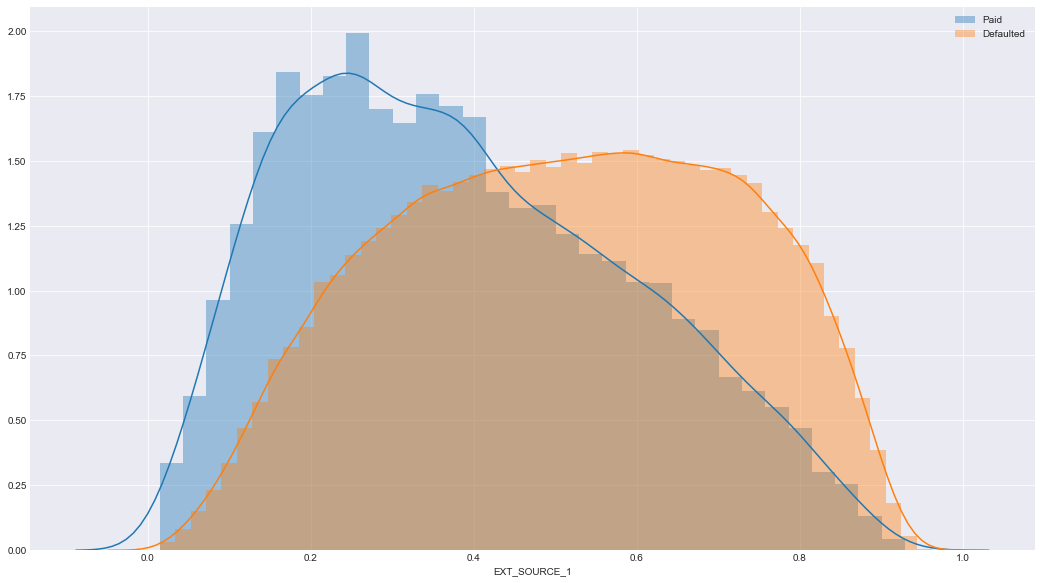

In [62]:
fig, ax = plt.subplots(figsize=(18,10))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].EXT_SOURCE_1.dropna(), label=labels_[target])
    
plt.legend()
plt.show()

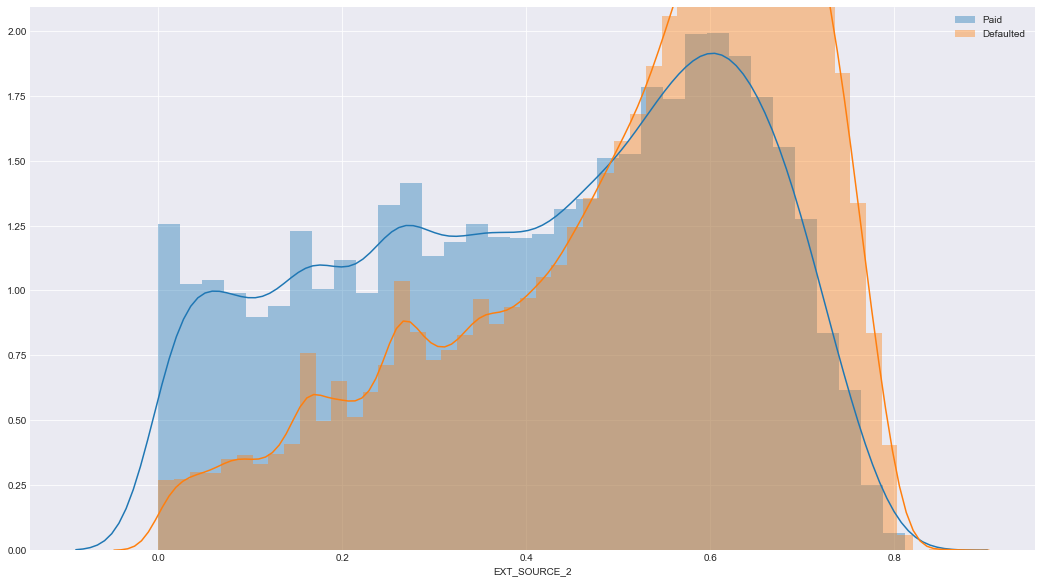

In [63]:
fig, ax = plt.subplots(figsize=(18,10))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].EXT_SOURCE_2.dropna(), label=labels_[target])
    
plt.legend()
plt.show()

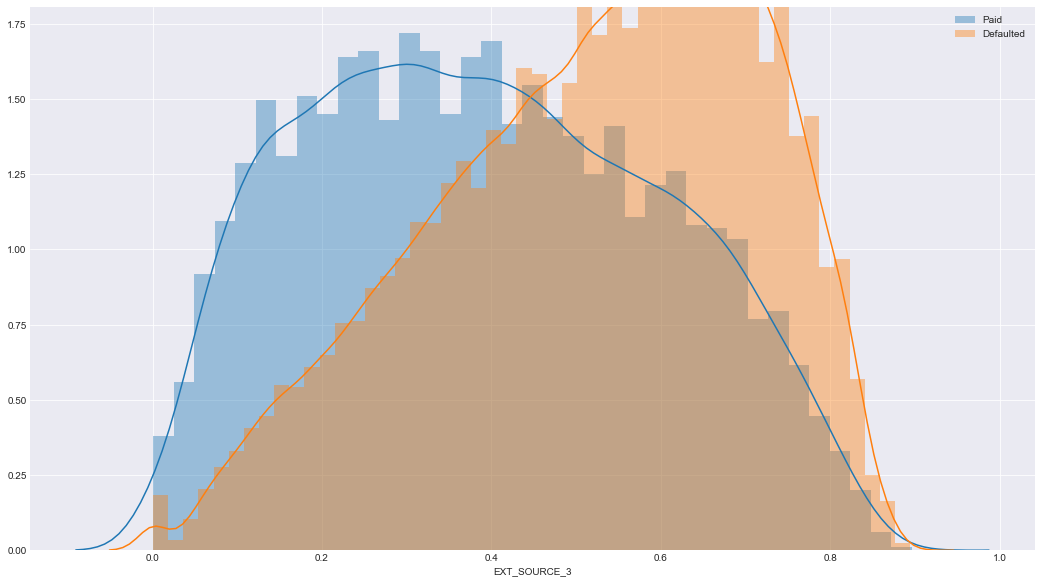

In [64]:
fig, ax = plt.subplots(figsize=(18,10))
labels_ = ['Defaulted', 'Paid']
for target in [1,0]:
    sns.distplot(application_train[application_train['TARGET']==target].EXT_SOURCE_3.dropna(), label=labels_[target])
    
plt.legend()
plt.show()

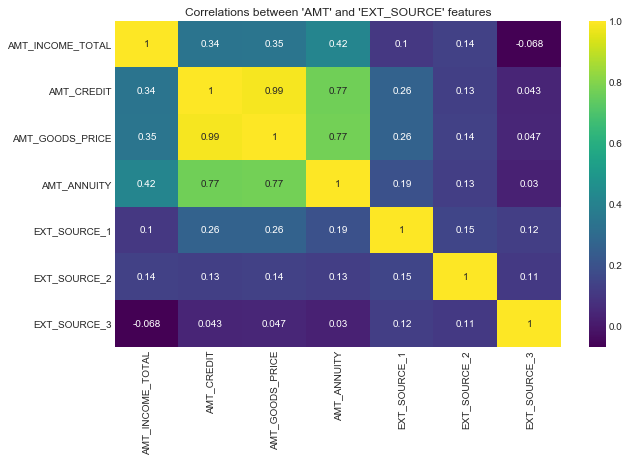

In [179]:
ext_and_amts = application_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
                                  'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Default']]

plt.figure(figsize=(10,6))
sns.heatmap(ext_and_amts.drop('Default',axis=1).corr(), cmap='viridis', annot=True)
plt.title("Correlations between 'AMT' and 'EXT_SOURCE' features")
plt.show()

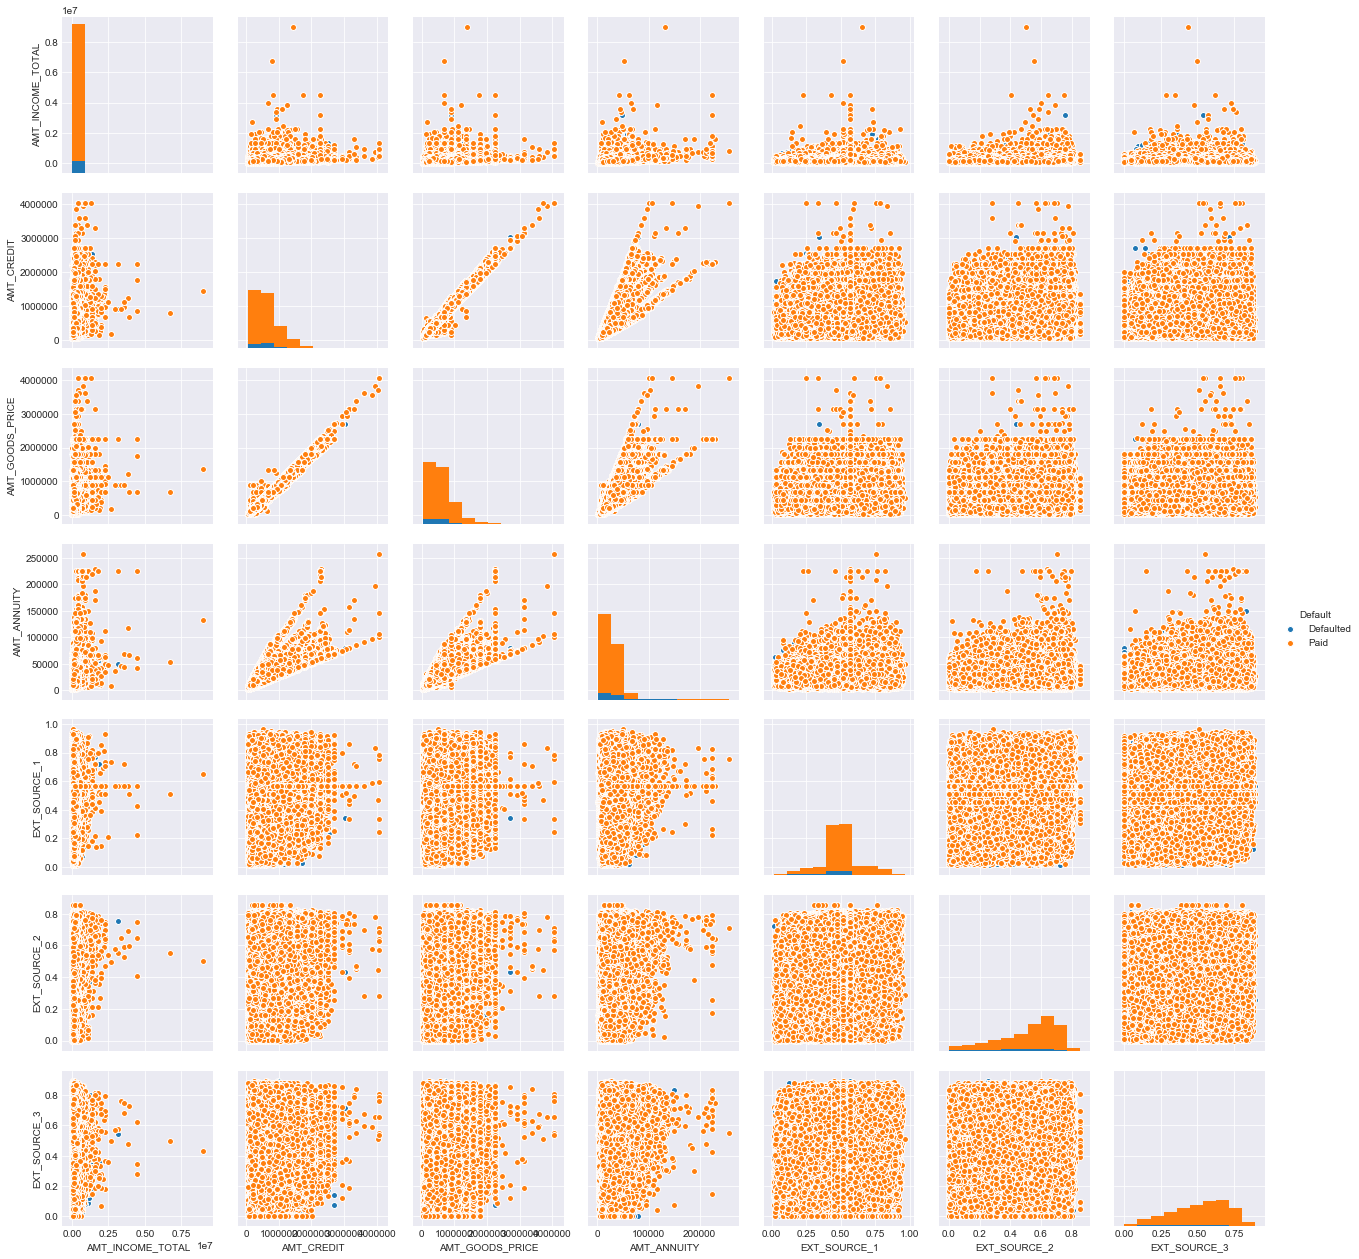

In [181]:
plt.figure(figsize=(10,10))
sns.pairplot(ext_and_amts.dropna(), hue='Default')
plt.show()

### Visualizing some categoricals

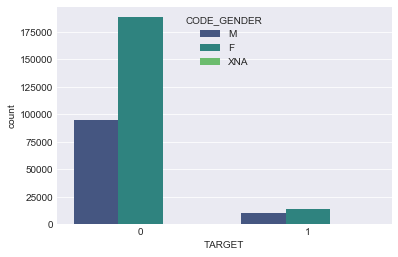

In [40]:
sns.countplot('TARGET', hue='CODE_GENDER', data=application_train, palette='viridis')
plt.show()

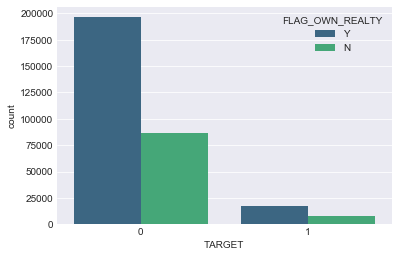

In [41]:
sns.countplot('TARGET', hue='FLAG_OWN_REALTY', data=application_train, palette='viridis')
plt.show()

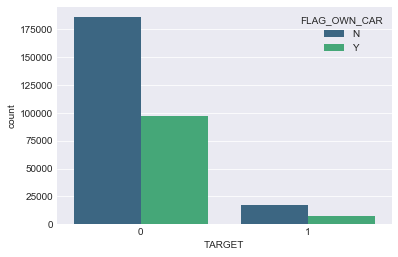

In [42]:
sns.countplot('TARGET', hue='FLAG_OWN_CAR', data=application_train, palette='viridis')
plt.show()

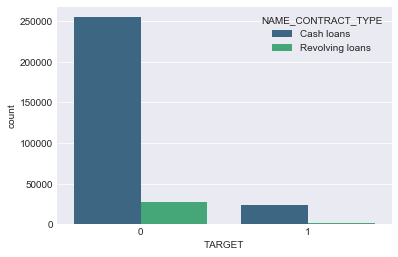

In [43]:
sns.countplot('TARGET', hue='NAME_CONTRACT_TYPE', data=application_train, palette='viridis')
plt.show()

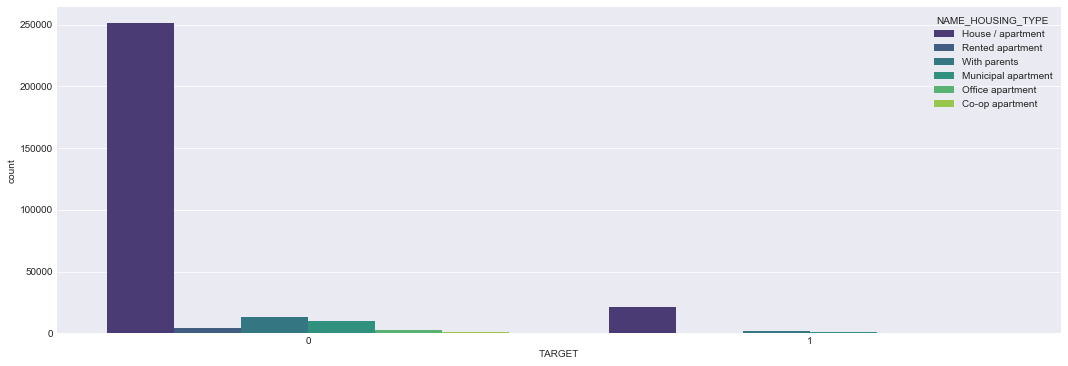

In [44]:
plt.figure(figsize=(18,6))
sns.countplot('TARGET', hue='NAME_HOUSING_TYPE', data=application_train, palette='viridis')
plt.show()

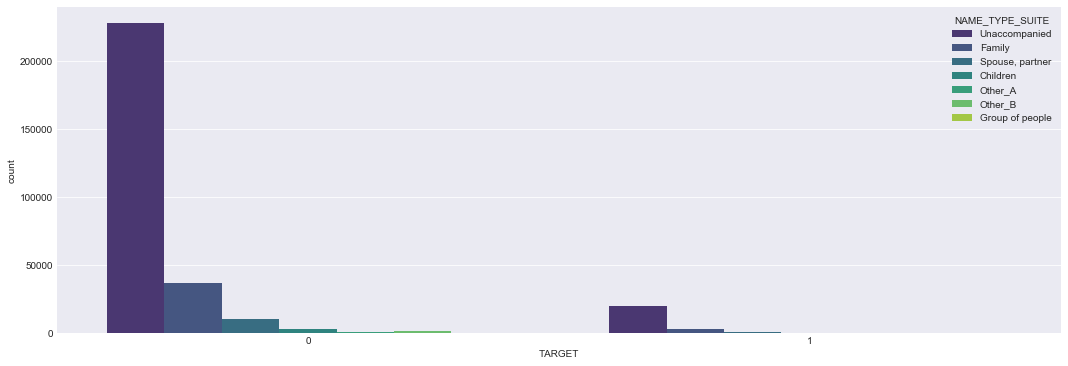

In [45]:
plt.figure(figsize=(18,6))
sns.countplot('TARGET', hue='NAME_TYPE_SUITE', data=application_train, palette='viridis')
plt.show()

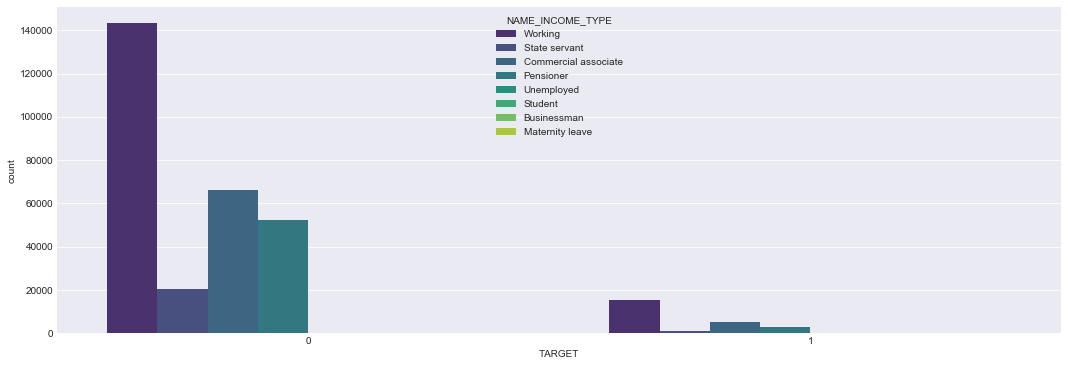

In [46]:
plt.figure(figsize=(18,6))
sns.countplot('TARGET', hue='NAME_INCOME_TYPE', data=application_train, palette='viridis')
plt.show()

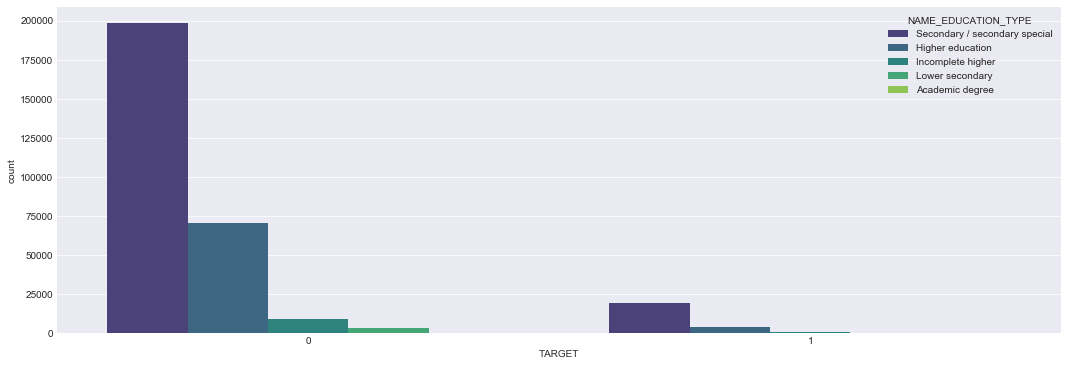

In [47]:
plt.figure(figsize=(18,6))
sns.countplot('TARGET', hue='NAME_EDUCATION_TYPE', data=application_train, palette='viridis')
plt.show()

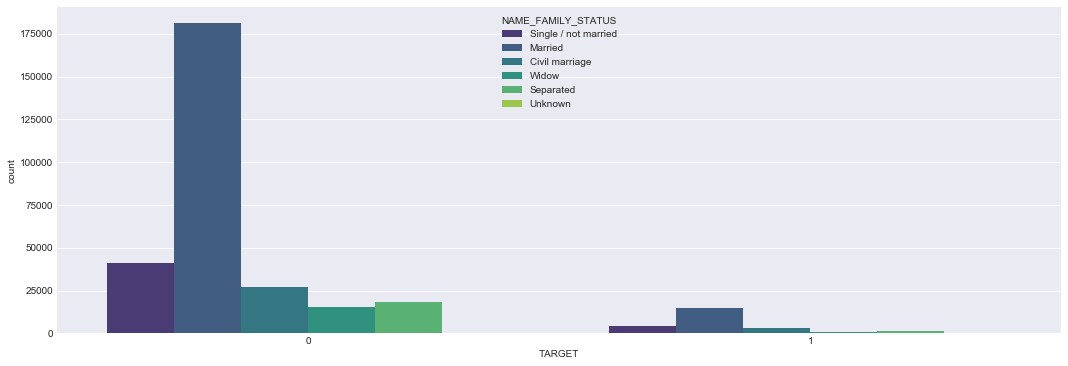

In [48]:
plt.figure(figsize=(18,6))
sns.countplot('TARGET', hue='NAME_FAMILY_STATUS', data=application_train, palette='viridis')
plt.show()

## 3. Feature Engineering/data cleaning

In [247]:
# Remove outliers per the findings above and determined from other kernels
application_train = application_train[application_train['AMT_INCOME_TOTAL'] != 1.170000e+08]
application_train = application_train[application_train['AMT_REQ_CREDIT_BUREAU_QRT'] != 261] # From other kernels
application_train = application_train[application_train['OBS_30_CNT_SOCIAL_CIRCLE'] < 300] # From other kernels
application_train['DAYS_EMPLOYED'] = (application_train['DAYS_EMPLOYED'].apply(lambda x: x if x != 365243 else np.nan))

### 3a. Categorical clean-up

In [231]:
# Using LabelEncoder for our binary categoricals
from sklearn.preprocessing import LabelEncoder

In [248]:
binary_cats = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE']
for cat in binary_cats:
    label = LabelEncoder()
    application_train[cat] = label.fit_transform(application_train[cat])
    
print(application_train[binary_cats].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306487 entries, 0 to 307510
Data columns (total 4 columns):
CODE_GENDER           306487 non-null int64
FLAG_OWN_REALTY       306487 non-null int64
FLAG_OWN_CAR          306487 non-null int64
NAME_CONTRACT_TYPE    306487 non-null int64
dtypes: int64(4)
memory usage: 11.7 MB
None


In [233]:
# Using OneHotEncoder for multi-category categoricals
from sklearn.preprocessing import OneHotEncoder

In [249]:
# First impute majority class for null values in 'NAME_TYPE_SUITE'
application_train['NAME_TYPE_SUITE'][application_train['NAME_TYPE_SUITE'].isnull()] = 'Unaccompanied'

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [250]:
multi_cats = ['NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE']
feat_matrices = []
for cat in multi_cats:
    
    # Convert to integer
    label = LabelEncoder()
    label_encoded = label.fit_transform(application_train[cat])
    
    # Convert to multi-category with OHE
    ohe = OneHotEncoder(sparse=False)
    label_encoded = label_encoded.reshape(len(label_encoded),1)
    ohe_encoded = ohe.fit_transform(label_encoded)
    
    # Formatting to concatenate with application_train
    ohe_df = pd.DataFrame(ohe_encoded)
    n_cats = ohe_df.columns.tolist()
    cat_names = [cat + "_CLASS_" + str(i) for i in n_cats]
    ohe_df.columns = cat_names
    
    feat_matrices.append(ohe_df)
        
all_multi_encs = pd.concat(feat_matrices, axis=1)
all_multi_encs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306487 entries, 0 to 306486
Data columns (total 32 columns):
NAME_TYPE_SUITE_CLASS_0        306487 non-null float64
NAME_TYPE_SUITE_CLASS_1        306487 non-null float64
NAME_TYPE_SUITE_CLASS_2        306487 non-null float64
NAME_TYPE_SUITE_CLASS_3        306487 non-null float64
NAME_TYPE_SUITE_CLASS_4        306487 non-null float64
NAME_TYPE_SUITE_CLASS_5        306487 non-null float64
NAME_TYPE_SUITE_CLASS_6        306487 non-null float64
NAME_EDUCATION_TYPE_CLASS_0    306487 non-null float64
NAME_EDUCATION_TYPE_CLASS_1    306487 non-null float64
NAME_EDUCATION_TYPE_CLASS_2    306487 non-null float64
NAME_EDUCATION_TYPE_CLASS_3    306487 non-null float64
NAME_EDUCATION_TYPE_CLASS_4    306487 non-null float64
NAME_FAMILY_STATUS_CLASS_0     306487 non-null float64
NAME_FAMILY_STATUS_CLASS_1     306487 non-null float64
NAME_FAMILY_STATUS_CLASS_2     306487 non-null float64
NAME_FAMILY_STATUS_CLASS_3     306487 non-null float64
NAME_FAMI

### 3b. Converting some continuous variables to binned variants

#### AMT_ANNUITY

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


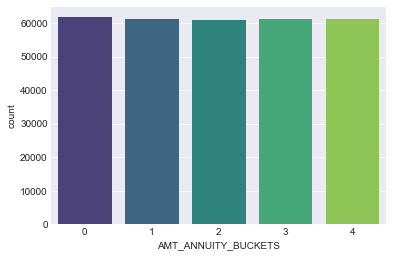

In [302]:
# Create a AMT_ANNUITY bucket feature
application_train['AMT_ANNUITY'][application_train['AMT_ANNUITY'].isnull()] = application_train['AMT_ANNUITY'].median()
application_train['AMT_ANNUITY_BUCKETS'] = pd.qcut(application_train['AMT_ANNUITY'], 5, labels=np.arange(0,5))

sns.countplot(application_train['AMT_ANNUITY_BUCKETS'], palette='viridis')
plt.show()

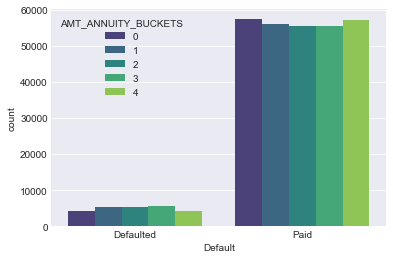

In [303]:
sns.countplot(x='Default', hue='AMT_ANNUITY_BUCKETS', data=application_train, palette='viridis')
plt.show()

#### AMT_INCOME_TOTAL

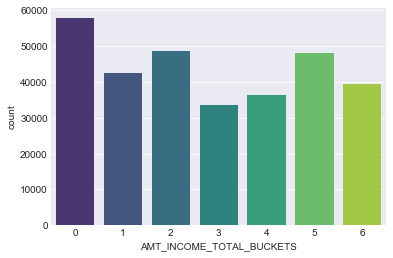

In [255]:
# Create a AMT_INCOME_TOTAL bucket feature
application_train['AMT_INCOME_TOTAL_BUCKETS'] = pd.qcut(application_train['AMT_INCOME_TOTAL'], 7, labels=np.arange(0,7))

sns.countplot(application_train['AMT_INCOME_TOTAL_BUCKETS'], palette='viridis')
plt.show()

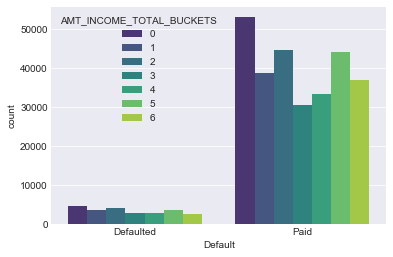

In [256]:
sns.countplot(x='Default', hue='AMT_INCOME_TOTAL_BUCKETS', data=application_train, palette='viridis')
plt.show()

####  AMT_CREDIT

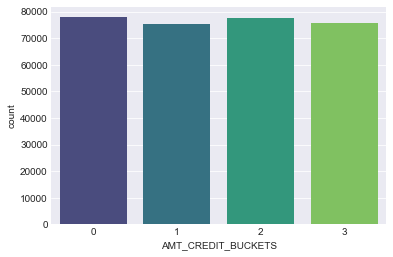

In [257]:
# Create a AMT_CREDIT bucket feature
application_train['AMT_CREDIT_BUCKETS'] = pd.qcut(application_train['AMT_CREDIT'], 4, labels=np.arange(0,4))

sns.countplot(application_train['AMT_CREDIT_BUCKETS'], palette='viridis')
plt.show()

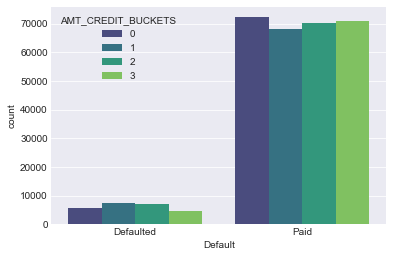

In [258]:
sns.countplot(x='Default', hue='AMT_CREDIT_BUCKETS', data=application_train, palette='viridis')
plt.show()

#### AMT_GOODS_PRICE

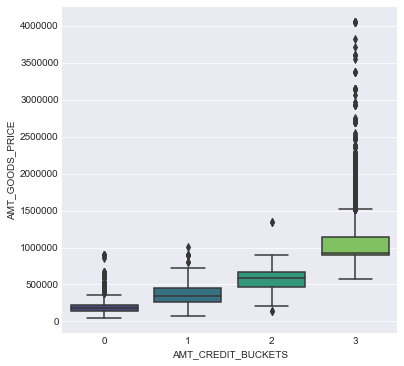

In [279]:
# Since we're missing values here and the correlation between this and credit is really high, impute missings by those buckets
# Visualize the external source variable relative to the credit buckets, which do seem to separate things out somewhat
plt.figure(figsize=(6,6))
sns.boxplot(x='AMT_CREDIT_BUCKETS', y='AMT_GOODS_PRICE', data=application_train ,palette='viridis')
plt.show()

In [280]:
# Impute the missing values in AMT_GOODS_PRICE based on credit buckets
AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS = application_train.groupby('AMT_CREDIT_BUCKETS').median()['AMT_GOODS_PRICE']
print(AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS)

application_train['AMT_GOODS_PRICE'] = np.where((application_train['AMT_GOODS_PRICE'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 0), AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS.iloc[0],
              np.where((application_train['AMT_GOODS_PRICE'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 1), AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS.iloc[1],
              np.where((application_train['AMT_GOODS_PRICE'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 2), AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS.iloc[2],
              np.where((application_train['AMT_GOODS_PRICE'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 3), AMT_GOODS_PRICE_by_AMT_CREDIT_BUCKETS.iloc[3],         
              application_train['AMT_GOODS_PRICE']))))

AMT_CREDIT_BUCKETS
0    180000.0
1    342000.0
2    585000.0
3    927000.0
Name: AMT_GOODS_PRICE, dtype: float64


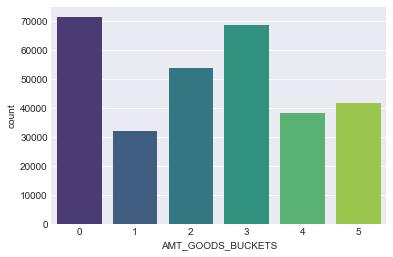

In [281]:
application_train['AMT_GOODS_BUCKETS'] = pd.qcut(application_train['AMT_GOODS_PRICE'], 6, labels=np.arange(0,6))

sns.countplot(application_train['AMT_GOODS_BUCKETS'], palette='viridis')
plt.show()

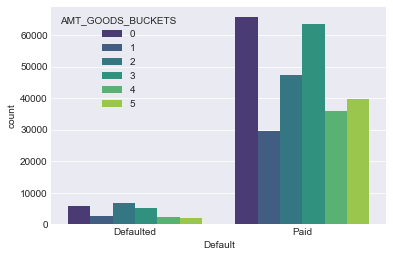

In [282]:
sns.countplot('Default', hue='AMT_GOODS_BUCKETS', data=application_train, palette='viridis')
plt.show()

#### DAYS_REGISTRATION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306487 entries, 0 to 307510
Data columns (total 4 columns):
DAYS_EMPLOYED        251285 non-null float64
DAYS_BIRTH           306487 non-null int64
DAYS_REGISTRATION    306487 non-null float64
DAYS_ID_PUBLISH      306487 non-null int64
dtypes: float64(2), int64(2)
memory usage: 21.7 MB
None


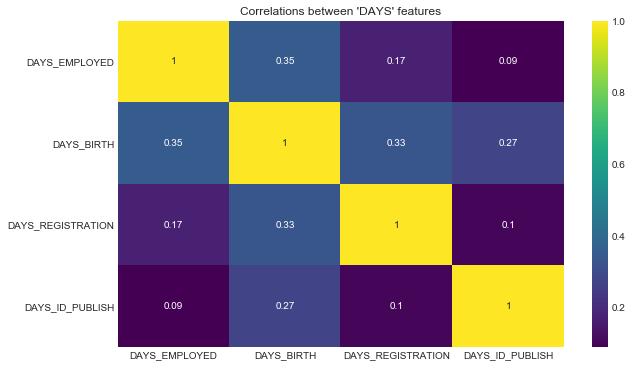

In [287]:
days_feats = application_train[['DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']]
print(days_feats.info())

plt.figure(figsize=(10,6))
sns.heatmap(days_feats.corr(), cmap='viridis', annot=True)
plt.title("Correlations between 'DAYS' features")
plt.show()

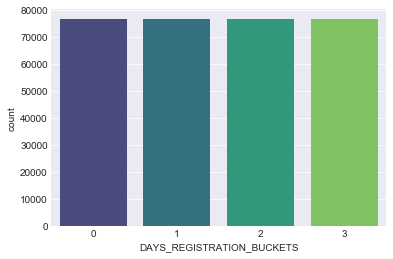

In [288]:
# Create a DAYS_REGISTRATION bucket feature
application_train['DAYS_REGISTRATION_BUCKETS'] = pd.qcut(application_train['DAYS_REGISTRATION'], 4, labels=np.arange(0,4))

sns.countplot(application_train['DAYS_REGISTRATION_BUCKETS'], palette='viridis')
plt.show()

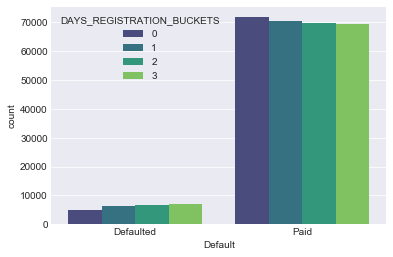

In [289]:
sns.countplot(x='Default', hue='DAYS_REGISTRATION_BUCKETS', data=application_train, palette='viridis')
plt.show()

#### DAYS_EMPLOYED

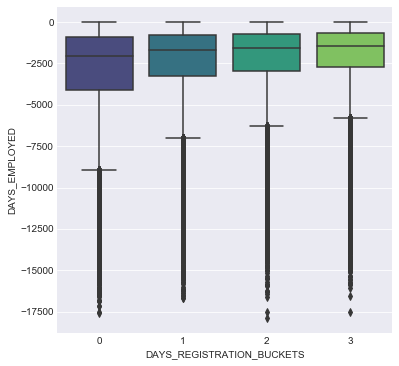

In [290]:
# Visualize the external source variable relative to the credit buckets, which do seem to separate things out somewhat
plt.figure(figsize=(6,6))
sns.boxplot(x='DAYS_REGISTRATION_BUCKETS', y='DAYS_EMPLOYED', data=application_train ,palette='viridis')
plt.show()

In [292]:
# Impute the missing values in DAYS_EMPLOYED based on credit buckets
DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS = application_train.groupby('DAYS_REGISTRATION_BUCKETS').median()['DAYS_EMPLOYED']
print(DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS)

application_train['DAYS_EMPLOYED'] = np.where((application_train['DAYS_EMPLOYED'].isnull()) & (application_train['DAYS_REGISTRATION_BUCKETS'] == 0), DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS.iloc[0],
              np.where((application_train['DAYS_EMPLOYED'].isnull()) & (application_train['DAYS_REGISTRATION_BUCKETS'] == 1), DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS.iloc[1],
              np.where((application_train['DAYS_EMPLOYED'].isnull()) & (application_train['DAYS_REGISTRATION_BUCKETS'] == 2), DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS.iloc[2],
              np.where((application_train['DAYS_EMPLOYED'].isnull()) & (application_train['DAYS_REGISTRATION_BUCKETS'] == 3), DAYS_EMPLOYED_by_DAYS_REGISTRATION_BUCKETS.iloc[3],         
              application_train['DAYS_EMPLOYED']))))

DAYS_REGISTRATION_BUCKETS
0   -2057.0
1   -1714.0
2   -1567.0
3   -1436.0
Name: DAYS_EMPLOYED, dtype: float64


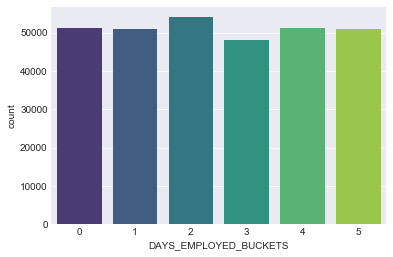

In [294]:
# Create a DAYS_EMPLOYED bucket feature
application_train['DAYS_EMPLOYED_BUCKETS'] = pd.qcut(application_train['DAYS_EMPLOYED'], 6, labels=np.arange(0,6))

sns.countplot(application_train['DAYS_EMPLOYED_BUCKETS'], palette='viridis')
plt.show()

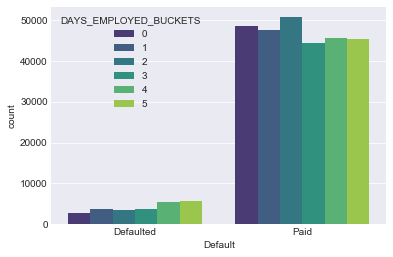

In [295]:
sns.countplot(x='Default', hue='DAYS_EMPLOYED_BUCKETS', data=application_train, palette='viridis')
plt.show()

#### DAYS_ID_PUBLISH

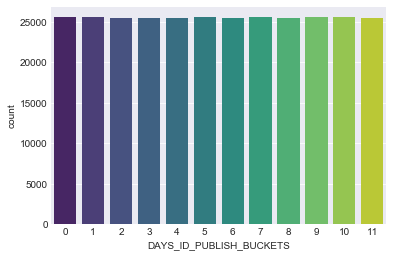

In [263]:
# Create a DAYS_ID_PUBLISH bucket feature
application_train['DAYS_ID_PUBLISH_BUCKETS'] = pd.qcut(application_train['DAYS_ID_PUBLISH'], 12, labels=np.arange(0,12))

sns.countplot(application_train['DAYS_ID_PUBLISH_BUCKETS'], palette='viridis')
plt.show()

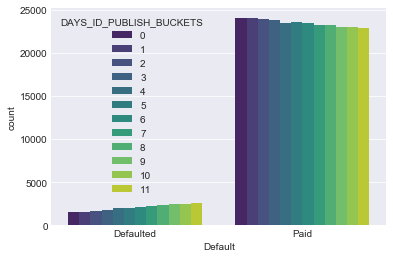

In [264]:
sns.countplot(x='Default', hue='DAYS_ID_PUBLISH_BUCKETS', data=application_train, palette='viridis')
plt.show()

In [317]:
# Encode buckets to integers
type_series = application_train.dtypes == 'category'
cat_feats = type_series[type_series].index.tolist()

for cat in cat_feats:
    label = LabelEncoder()
    application_train[cat] = label.fit_transform(application_train[cat])

### 3c. External Source Variables

#### EXT_SOURCE_1

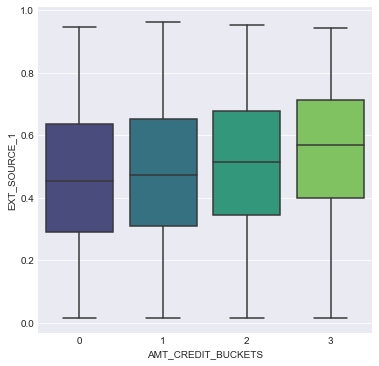

In [265]:
# Visualize the external source variable relative to the credit buckets, which do seem to separate things out somewhat
plt.figure(figsize=(6,6))
sns.boxplot(x='AMT_CREDIT_BUCKETS', y='EXT_SOURCE_1', data=application_train ,palette='viridis')
plt.show()

In [266]:
# Impute the missing values in EXT_SOURCE_1 based on credit buckets
EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS = application_train.groupby('AMT_CREDIT_BUCKETS').median()['EXT_SOURCE_1']
print(EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS)

AMT_CREDIT_BUCKETS
0    0.454348
1    0.474239
2    0.514458
3    0.567700
Name: EXT_SOURCE_1, dtype: float64


In [267]:
application_train['EXT_SOURCE_1'] = np.where((application_train['EXT_SOURCE_1'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 0), EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS.iloc[0],
              np.where((application_train['EXT_SOURCE_1'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 1), EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS.iloc[1],
              np.where((application_train['EXT_SOURCE_1'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 2), EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS.iloc[2],
              np.where((application_train['EXT_SOURCE_1'].isnull()) & (application_train['AMT_CREDIT_BUCKETS'] == 3), EXT_SOURCE_1_by_AMT_CREDIT_BUCKETS.iloc[3],         
              application_train['EXT_SOURCE_1']))))

#### EXT_SOURCE_2

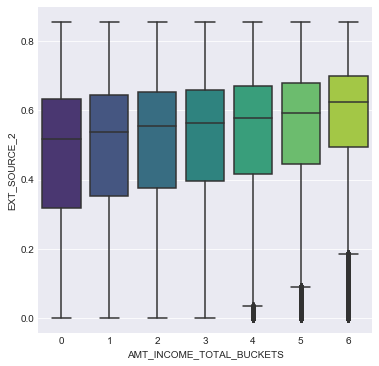

In [268]:
# Visualize the external source variable relative to the income buckets, which do seem to separate things out somewhat
plt.figure(figsize=(6,6))
sns.boxplot(x='AMT_INCOME_TOTAL_BUCKETS', y='EXT_SOURCE_2', data=application_train ,palette='viridis')
plt.show()

In [269]:
# Impute the missing values in EXT_SOURCE_2 based on INCOME_TOTAL buckets
EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS = application_train.groupby('AMT_INCOME_TOTAL_BUCKETS').median()['EXT_SOURCE_2']
print(EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS)

AMT_INCOME_TOTAL_BUCKETS
0    0.516571
1    0.537897
2    0.554476
3    0.563728
4    0.577193
5    0.591770
6    0.623135
Name: EXT_SOURCE_2, dtype: float64


In [270]:
application_train['EXT_SOURCE_2'] = np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 0), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[0],
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 1), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[1],
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 2), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[2],
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 3), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[3],         
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 4), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[4],
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 5), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[5],
              np.where((application_train['EXT_SOURCE_2'].isnull()) & (application_train['AMT_INCOME_TOTAL_BUCKETS'] == 6), EXT_SOURCE_2_by_AMT_INCOME_TOTAL_BUCKETS.iloc[6],  
              application_train['EXT_SOURCE_2'])))))))

#### EXT_SOURCE_3

In [271]:
# EXT_SOURCE_3 is poorly correlated with all of the other AMT variables, so we will apply median imputing here
application_train['EXT_SOURCE_3'][application_train['EXT_SOURCE_3'].isnull()] = application_train['EXT_SOURCE_3'].median()

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Capturing non-linearities

In [272]:
application_train['EXT_SOURCE_1OVER2'] = application_train['EXT_SOURCE_1']/application_train['EXT_SOURCE_2']
application_train['EXT_SOURCE_1OVER3'] = application_train['EXT_SOURCE_1']/application_train['EXT_SOURCE_3']
application_train['EXT_SOURCE_2OVER1'] = application_train['EXT_SOURCE_2']/application_train['EXT_SOURCE_1']
application_train['EXT_SOURCE_2OVER3'] = application_train['EXT_SOURCE_2']/application_train['EXT_SOURCE_3']
application_train['EXT_SOURCE_3OVER2'] = application_train['EXT_SOURCE_3']/application_train['EXT_SOURCE_2']
application_train['EXT_SOURCE_3OVER1'] = application_train['EXT_SOURCE_3']/application_train['EXT_SOURCE_1']

### 3d. Inquiries and Income Ratio

In [273]:
# Create a total inquiries feature
application_train['NUM_INQ_TOT'] = application_train[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

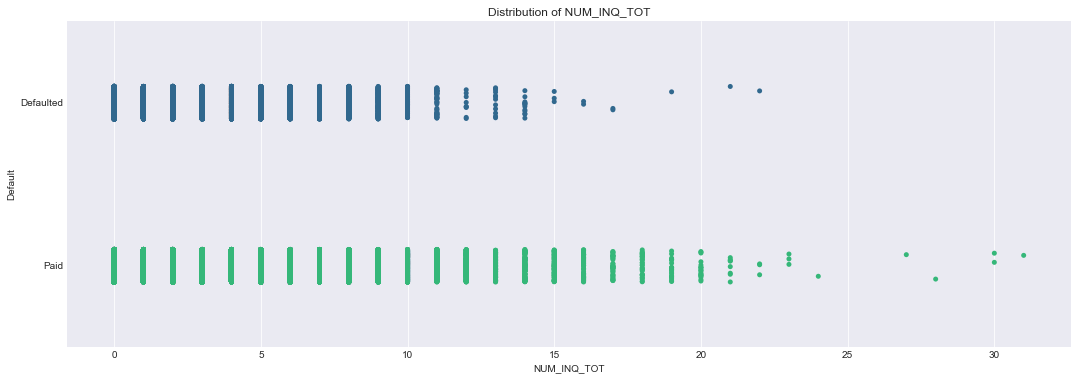

In [274]:
plt.figure(figsize=(18,6))
plt.title('Distribution of NUM_INQ_TOT')
sns.stripplot(x='NUM_INQ_TOT', y='Default', data=application_train, jitter=1, palette='viridis')
plt.show()

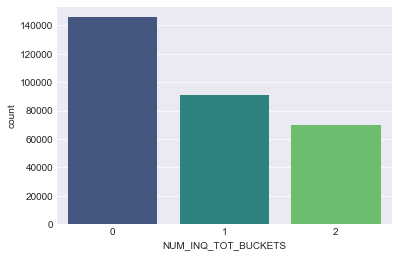

In [275]:
# Create a NUM_INQ_TOT bucket feature
application_train['NUM_INQ_TOT_BUCKETS'] = pd.qcut(application_train['NUM_INQ_TOT'], 3, labels=np.arange(0,3))

sns.countplot(application_train['NUM_INQ_TOT_BUCKETS'], palette='viridis')
plt.show()

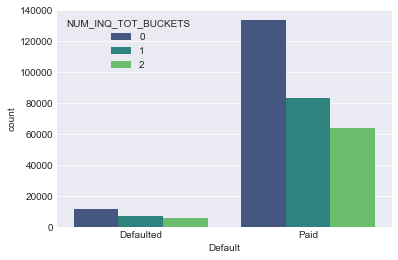

In [276]:
sns.countplot(x='Default', hue='NUM_INQ_TOT_BUCKETS', data=application_train, palette='viridis')
plt.show()

In [277]:
application_train['INC_CRED_RATIO'] = application_train['AMT_CREDIT']/application_train['AMT_INCOME_TOTAL']

## 4. Assemble dataset 

In [318]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306487 entries, 0 to 307510
Data columns (total 92 columns):
SK_ID_CURR                     306487 non-null int64
TARGET                         306487 non-null int64
NAME_CONTRACT_TYPE             306487 non-null int64
CODE_GENDER                    306487 non-null int64
FLAG_OWN_CAR                   306487 non-null int64
FLAG_OWN_REALTY                306487 non-null int64
CNT_CHILDREN                   306487 non-null int64
AMT_INCOME_TOTAL               306487 non-null float64
AMT_CREDIT                     306487 non-null float64
AMT_ANNUITY                    306487 non-null float64
AMT_GOODS_PRICE                306487 non-null float64
NAME_TYPE_SUITE                306487 non-null object
NAME_INCOME_TYPE               306487 non-null object
NAME_EDUCATION_TYPE            306487 non-null object
NAME_FAMILY_STATUS             306487 non-null object
NAME_HOUSING_TYPE              306487 non-null object
REGION_POPULATION_RELATIVE  

In [350]:
application_train.reset_index(inplace=True)

### 4a. Downsampling

### 4b. Feature selection

In [351]:
# Select features for training
X_ = pd.concat([application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                                   'AMT_GOODS_BUCKETS', 'AMT_ANNUITY_BUCKETS', 'AMT_CREDIT_BUCKETS', 'AMT_INCOME_TOTAL_BUCKETS',
                                   'DAYS_EMPLOYED_BUCKETS', 'DAYS_REGISTRATION_BUCKETS', 'DAYS_ID_PUBLISH_BUCKETS', 'DAYS_BIRTH',
                                   'NUM_INQ_TOT_BUCKETS', 
                                   'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE',
                                   'INC_CRED_RATIO',
                                   'CNT_CHILDREN', 'REGION_RATING_CLIENT',
                                   'EXT_SOURCE_1OVER2', 'EXT_SOURCE_1OVER3', 'EXT_SOURCE_2OVER1',
                                   'EXT_SOURCE_2OVER3', 'EXT_SOURCE_3OVER2', 'EXT_SOURCE_3OVER1',
                                  ]],
               all_multi_encs], axis=1)

y = application_train['TARGET']

In [353]:
# Scale features prior to estimation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)
X = pd.DataFrame(X_scaled)
X.columns  = X_.columns

X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306487 entries, 0 to 306486
Data columns (total 57 columns):
EXT_SOURCE_1                   306487 non-null float64
EXT_SOURCE_2                   306487 non-null float64
EXT_SOURCE_3                   306487 non-null float64
AMT_GOODS_BUCKETS              306487 non-null int64
AMT_ANNUITY_BUCKETS            306487 non-null int64
AMT_CREDIT_BUCKETS             306487 non-null int64
AMT_INCOME_TOTAL_BUCKETS       306487 non-null int64
DAYS_EMPLOYED_BUCKETS          306487 non-null int64
DAYS_REGISTRATION_BUCKETS      306487 non-null int64
DAYS_ID_PUBLISH_BUCKETS        306487 non-null int64
DAYS_BIRTH                     306487 non-null int64
NUM_INQ_TOT_BUCKETS            306487 non-null int64
CODE_GENDER                    306487 non-null int64
FLAG_OWN_REALTY                306487 non-null int64
FLAG_OWN_CAR                   306487 non-null int64
NAME_CONTRACT_TYPE             306487 non-null int64
INC_CRED_RATIO                 3064

## 5. Modelling

In [354]:
# Split 
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [355]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

_ = cross_validate(knn, X_train, y_train,cv=5)['test_score']
print("% Mean Accuracy: {}".format(np.array(_).mean()))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

for row in sorted(list(zip(X_train.columns.tolist(), gbc.feature_importances_.tolist())), key=lambda x:x[1], reverse=True):
    print(row)

[[92887    98]
 [ 8057    99]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     92985
          1       0.50      0.01      0.02      8156

avg / total       0.89      0.92      0.88    101141

('EXT_SOURCE_3', 0.14106600966123328)
('EXT_SOURCE_2', 0.12264325090893155)
('EXT_SOURCE_1', 0.09718446288243747)
('DAYS_BIRTH', 0.09491893551038641)
('AMT_CREDIT', 0.05746615902717335)
('AMT_ANNUITY', 0.04818774586587619)
('DAYS_ID_PUBLISH', 0.04370893117298045)
('DAYS_EMPLOYED', 0.04237379226164479)
('M', 0.04078068676525258)
('EXT_SOURCE_2OVER3', 0.031867874453296745)
('INC_CRED_RATIO', 0.028230782182598554)
('Higher education', 0.02386846011765863)
('EXT_SOURCE_3OVER1', 0.021232130964754924)
('DAYS_REGISTRATION', 0.021149415982585396)
('EXT_SOURCE_1OVER3', 0.0196516714645313)
('Working', 0.017673054786368027)
('Y', 0.01696127674406659)
('AMT_GOODS_PRICE', 0.014049633567969415)
('EXT_SOURCE_2OVER1', 0.013723300420881374)
('Revolving loans', 

# Prepare test dataset

In [207]:
# Create a dataframe with information on these missing values
tot_msg = test.isnull().sum(axis=0)
pct_msg = tot_msg/test.shape[0]
msg_info = pd.concat([tot_msg, pct_msg], axis=1)
msg_info.columns = ['# Missing Obs.', '% Missing Obs.']

msg_info

,# Missing Obs.,% Missing Obs.
SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,24,0.000492
AMT_GOODS_PRICE,0,0.000000


In [208]:
# Remove outliers per the findings above and determined from other kernels
test['AMT_INCOME_TOTAL'] = (test['AMT_INCOME_TOTAL'].apply(lambda x: x if x != 1.170000e+08 else np.nan))
test['DAYS_EMPLOYED'] = (test['DAYS_EMPLOYED'].apply(lambda x: x if x != 365243 else np.nan))

In [209]:
# Creating some dummies/binaries with the categorical variables above - CLEAN UP THE LABELS ON THESE GUYS
gender_dummies = pd.get_dummies(test['CODE_GENDER'])
realty_dummies = pd.get_dummies(test['FLAG_OWN_REALTY'])
car_dummies = pd.get_dummies(test['FLAG_OWN_CAR'])
contract_dummies = pd.get_dummies(test['NAME_CONTRACT_TYPE'])
education_dummies = pd.get_dummies(test['NAME_EDUCATION_TYPE'])
family_dummies = pd.get_dummies(test['NAME_FAMILY_STATUS'])
housing_dummies = pd.get_dummies(test['NAME_HOUSING_TYPE'])
income_dummies = pd.get_dummies(test['NAME_INCOME_TYPE'])

In [210]:
# Imputing missing values
features_ = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL']
for feature in features_:
    _ = test[feature].median()
    test[feature][test[feature].isnull()] = _

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [211]:
# Create an Income-to-Credit ratio feature
test['INC_CRED_RATIO'] = test['AMT_INCOME_TOTAL'].divide(test['AMT_CREDIT'])

In [212]:
# Create a total inquiries feature
test['NUM_INQ_TOT'] = test[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

In [213]:
# Create a AMT_GOODS_PRICE bucket feature
amt_goods_buckets = pd.cut(test['AMT_GOODS_PRICE'], 5, labels = np.arange(0,5))

In [214]:
# Select features for training
X_ = pd.concat([gender_dummies, realty_dummies, car_dummies, contract_dummies, education_dummies,
               family_dummies, housing_dummies, income_dummies, amt_goods_buckets,
               test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED',
                     'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'INC_CRED_RATIO', 'AMT_ANNUITY',
                     'DAYS_BIRTH', 'NUM_INQ_TOT', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION'
                                  ]]], axis=1)

X_['XNA'] = 0
X_['Unemployed'] = 0
X_['Unknown'] = 0
X_['Maternity leave'] = 0

X_.columns = X.columns

In [215]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 47 columns):
F                                48744 non-null uint8
M                                48744 non-null uint8
XNA                              48744 non-null uint8
N                                48744 non-null uint8
Y                                48744 non-null uint8
N                                48744 non-null uint8
Y                                48744 non-null uint8
Cash loans                       48744 non-null uint8
Revolving loans                  48744 non-null uint8
Academic degree                  48744 non-null uint8
Higher education                 48744 non-null uint8
Incomplete higher                48744 non-null uint8
Lower secondary                  48744 non-null uint8
Secondary / secondary special    48744 non-null uint8
Civil marriage                   48744 non-null uint8
Married                          48744 non-null uint8
Separated                  

In [216]:
# Scale features prior to estimation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)
X_test = pd.DataFrame(X_scaled)
X_test.columns  = X_.columns

In [217]:
# Fit final model
gbc.fit(X,y)
y_pred = gbc.predict_proba(X_test)

In [218]:
y_def = list(map(lambda x: x[1], y_pred))

In [219]:
# Prepare data for evaluation
final_predictions = pd.DataFrame.from_dict(dict(zip(test['SK_ID_CURR'], y_def)), orient='index')
final_predictions.reset_index(inplace=True)
final_predictions.columns = ['SK_ID_CURR', 'TARGET']

In [220]:
final_predictions.to_csv('default_predictions.csv',index=False)